In [1]:
import sys
print(sys.version)

3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]


In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad,value_and_grad,grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

# 1. Objective function: the Beale function
https://www.sfu.ca/~ssurjano/beale.html

In [4]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [5]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

In [6]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [7]:
z = f(x, y)

In [8]:
minima = np.array([3., .5])

In [9]:
f(*minima)

0.0

In [10]:
minima_ = minima.reshape(-1, 1)
minima_

array([[ 3. ],
       [ 0.5]])

In [11]:
f(*minima_)

array([ 0.])

In [12]:
def target_func(weights):
    x,y = weights
    return f(x,y)

# 2.Adam Optimizer

In [13]:
class Adam:
    def __init__(self, loss, weights, lr=0.001, beta1=0.9, beta2=0.999, epislon=1e-8):
        self.loss = loss
        self.theta = weights
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epislon = epislon
        self.get_gradient = grad(loss)
        self.m = 0
        self.v = 0
        self.t = 0

    def minimize_raw(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.m_hat = self.m / (1 - self.beta1 ** self.t)
        self.v_hat = self.v / (1 - self.beta2 ** self.t)
        self.theta -= self.lr * self.m_cat / (self.v_cat ** 0.5 + self.epislon)

    def minimize(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)

    def minimize_trace(self, path=[]):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + (1 - self.beta1) * g
        self.v = self.beta2 * self.v + (1 - self.beta2) * (g * g)
        self.theta -= lr * self.m / (self.v ** 0.5 + self.epislon)
        path.append(np.copy(self.theta))


In [14]:
EPOCHS = 3000
SHOW_STEPS = 100
PRECISION = 1e-8
weights = np.array([1., 1.5])
path_trace = [np.copy(weights)]
adam = Adam(target_func, weights, lr=0.01)
print("start to optimize EPOCHS:{}".format(EPOCHS))
progress_step = EPOCHS // SHOW_STEPS

for i in range(EPOCHS):
    if i % progress_step == 0:
        loss_value = adam.loss(adam.theta)
        print("times:{} weights:{} loss:{}".format(i, adam.theta, loss_value))
        if loss_value < PRECISION:
            print("loss:{} is less than precision:{}, finish!".format(loss_value, PRECISION))
            break
    adam.minimize_trace(path_trace)
print("\nfinal weights:{} loss:{}".format(adam.theta, adam.loss(adam.theta)))


start to optimize EPOCHS:3000
times:0 weights:[ 1.   1.5] loss:41.25
times:30 weights:[ 0.7371867   1.22939503] loss:20.299015115677488
times:60 weights:[ 0.60591868  1.04849877] loss:15.060862617226
times:90 weights:[ 0.58632034  0.91842752] loss:12.981397656153064
times:120 weights:[ 0.6502342   0.80472928] loss:11.321903656324578
times:150 weights:[ 0.78098643  0.69414189] loss:9.42760928272687
times:180 weights:[ 0.95890658  0.58512322] loss:7.2900861448751595
times:210 weights:[ 1.15977446  0.48274852] loss:5.207435732865861
times:240 weights:[ 1.36076875  0.39347367] loss:3.479710603481422
times:270 weights:[ 1.54570617  0.32136353] loss:2.228035884986305
times:300 weights:[ 1.70612102  0.26732981] loss:1.411090259141672
times:330 weights:[ 1.83962001  0.23008581] loss:0.9173472485588398
times:360 weights:[ 1.94767077  0.2072466 ] loss:0.6334829645634958
times:390 weights:[ 2.03377945  0.19605415] loss:0.47280443927631366
times:420 weights:[ 2.10220386  0.19378707] loss:0.3789137

In [15]:
print("-------------")
path_trace = np.array(path_trace).T
shape = path_trace.shape
if shape[1] > SHOW_STEPS:
    show_step = shape[1] // SHOW_STEPS
    path_trace = np.array(path_trace[:,::show_step])
print(path_trace)

-------------
[[ 1.          0.7371867   0.60591868  0.58632034  0.6502342   0.78098643
   0.95890658  1.15977446  1.36076875  1.54570617  1.70612102  1.83962001
   1.94767077  2.03377945  2.10220386  2.15712666  2.20219283  2.24031854
   2.27368033  2.30380576  2.33170617  2.3580134   2.38309961  2.40717167
   2.43033926  2.45266007  2.47416728  2.49488466  2.51483386  2.53403729
   2.55251875  2.57030322  2.5874163   2.60388375  2.61973105  2.63498313
   2.64966421  2.66379762  2.67740575  2.69051     2.70313081  2.7152876
   2.72699887  2.73828215  2.74915411  2.75963055  2.76972647  2.77945612
   2.78883299  2.79786993  2.80657914  2.81497221  2.82306018  2.83085356
   2.83836237  2.84559617  2.85256409  2.85927487  2.86573685  2.87195804
   2.87794611  2.88370843  2.88925209  2.8945839   2.89971044  2.90463802
   2.90937277  2.9139206   2.91828721  2.92247816  2.92649882  2.93035439
   2.93404994  2.93759039  2.94098055  2.94422508  2.94732853  2.95029536
   2.95312989  2.95583637

# 3.Visualize Convergence Trace

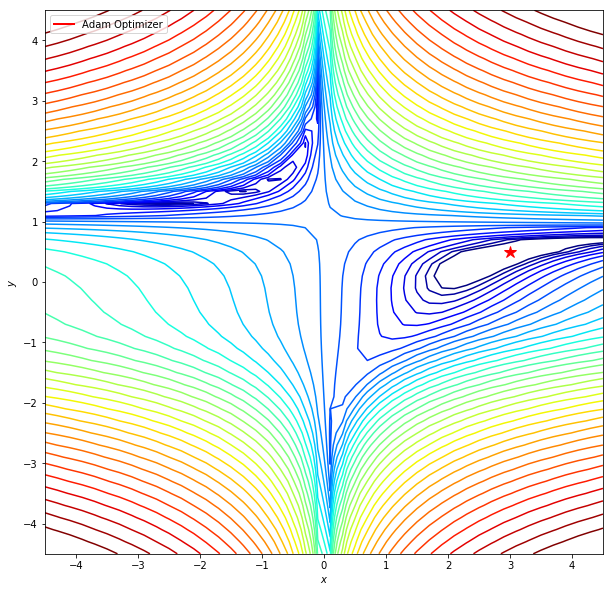

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=12)

line, = ax.plot([], [], 'r', label='Adam Optimizer', lw=2)
point, = ax.plot([], [], 'ro')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [17]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path_trace[::,:i])
    point.set_data(*path_trace[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path_trace.shape[1], interval=60, 
                               repeat_delay=5, blit=True)
HTML(anim.to_html5_video())